# estimate numba over heads

In [149]:
from numba import njit ,types as nbt, typeof, from_dtype
from numba.experimental import jitclass
import numpy as np
from timeit import timeit, repeat
from time import perf_counter
from typing import NamedTuple

float64_1D= typeof(np.zeros((1,),dtype=np.float64))
int32_1D= typeof(np.zeros((1,),dtype=np.int32))
@njit
def F1(a, index):
    s= 0.
    for n in index:
        s += a[n]
    return s

@njit(nbt.float64(float64_1D,int32_1D ))
def F1s(a, index):
    s= 0.
    for n in index:
        s += a[n]
    return s
DT=np.dtype([('f0', '<f8'), ('f1', '<f8', (2, 3))])
S= np.zeros((1,),dtype=DT)

@njit()
def F1sDT(a, index, ss, sss):
    s= 0.
    for n in index:
        s += a[n]
    return s


@njit
def F2(a,b, index):
    s= 0.
    for n in index:
        s += a[n] + b[n]
    return s

@njit(nbt.float64(float64_1D,float64_1D, int32_1D ))
def F2s(a,b, index):
    s= 0.
    for n in index:
        s += a[n] + b[n]
    return s

@njit
def F5(a,b,c,d,e, index):
    s= 0.
    for n in index:
        s += a[n] + b[n]+ c[n]+ d[n]+ e[n]
    return s

@njit([nbt.float64(float64_1D,float64_1D,float64_1D,float64_1D,float64_1D,int32_1D )])
def F5s(a,b,c,d,e, index):
    s= 0.
    for n in index:
        s += a[n] + b[n]+ c[n]+ d[n]+ e[n]
    return s

@njit
def F10(a,b,c,d,e,f,g,h,i,j, index):
    s= 0.
    for n in index:
        s += a[n] + b[n]+ c[n]+ d[n]+ e[n] + f[n]+ g[n]+ h[n]+ i[n]+ j[n]
    return s

@njit(nbt.float64(float64_1D,float64_1D,float64_1D,float64_1D,float64_1D,
                  float64_1D,float64_1D,float64_1D,float64_1D,float64_1D,
                 int32_1D ))
def F10s(a,b,c,d,e,f,g,h,i,j, index):
    s= 0.
    for n in index:
        s += a[n] + b[n]+ c[n]+ d[n]+ e[n] + f[n]+ g[n]+ h[n]+ i[n]+ j[n]
    return s


repeats= 100

n_fields = [1,10]
n_particles = np.asarray([ 10**2,500, 10**3,10**4,10**5,10**6,10**7],dtype=np.int32)
#n_particles = n_particles[:4] # testing
N = n_particles.size

t1= np.zeros((N,),dtype=np.float64)
t1s= np.zeros((N,),dtype=np.float64)
t1sDT= np.zeros((N,),dtype=np.float64)

t2= np.zeros((N,),dtype=np.float64)
t2s= np.zeros((N,),dtype=np.float64)

t5= np.zeros((N,),dtype=np.float64)
t5s= np.zeros((N,),dtype=np.float64)

t10 = np.zeros((N,),dtype=np.float64)
t10s= np.zeros((N,),dtype=np.float64)
frac = 0.5

for n ,n_part in enumerate(n_particles):
    
    a = np.zeros((n_part,), dtype=np.float64)
    active = np.sort(np.random.choice(np.arange(n_part), size=int(n_part*frac), replace=False)).astype(np.int32)
    print('n_part', n_part,active.size)
    
    #  base case   
    F1(a,active)
    t1[n]=  timeit(lambda  : F1(a,active),number=repeats) 

    F1s(a,active)
    t1s[n]=  timeit(lambda  : F1s(a,active),  number =repeats)  
    
    F1sDT(a,active,S,S)
    t1sDT[n]=  timeit(lambda  : F1sDT(a,active,S,S),  number =repeats)  
    
    F2(a,a,active)
    t2[n]=  timeit(lambda  : F2(a,a, active),  number =repeats) 

    F2s(a,a, active)
    t2s[n]=  timeit(lambda  : F2s(a, a, active),  number =repeats) 

    F5(a,a,a,a,a,active)
    t5[n]=  timeit(lambda  :  F5(a,a,a,a,a,active),  number =repeats) 

    F5s(a,a,a,a,a,active)
    t5s[n]=  timeit(lambda  :  F5s(a,a,a,a,a,active),  number =repeats)  

    F10(a,a,a,a,a,a,a,a,a,a,active)
    t10[n]=  timeit(lambda  :  F10(a,a,a,a,a,a,a,a,a,a,active),  number =repeats) 

    F10s(a,a,a,a,a,a,a,a,a,a,active)
    t10s[n]=  timeit(lambda  :  F10s(a,a,a,a,a,a,a,a,a,a,active),  number =repeats)  
       
        
 


n_part 100 50
n_part 500 250
n_part 1000 500
n_part 10000 5000
n_part 100000 50000
n_part 1000000 500000
n_part 10000000 5000000


Text(0.5, 0, 'loop count')

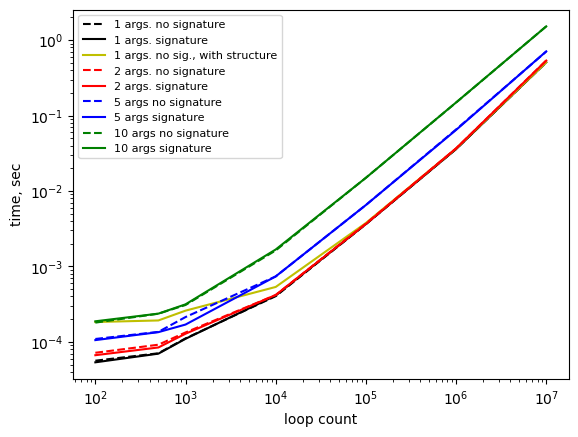

In [150]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots()
c=['k','r','b','g']
ax.plot(n_particles,t1,label =f'1 args. no signature',ls='--',c=c[0])
ax.plot(n_particles,t1s,label = f'1 args. signature',c=c[0])
ax.plot(n_particles,t1sDT,label = f'1 args. no sig., with structure',c='y')

ax.plot(n_particles,t2,label =f'2 args. no signature',c=c[1],ls='--')
ax.plot(n_particles,t2s,label = f'2 args. signature',c=c[1])

ax.plot(n_particles,t5,label =f'5 args no signature',c=c[2],ls='--')
ax.plot(n_particles,t5s,label = f'5 args signature',c=c[2])

ax.plot(n_particles,t10,label =f'10 args no signature',c=c[3],ls='--')
ax.plot(n_particles,t10s,label = f'10 args signature',c=c[3])

plt.xscale('log')
plt.yscale('log')
#ax.plot(ax.get_xlim(),ax.get_xlim(),c=[.8,.8,.8])
ax.legend(prop={'size': 8})
ax.set_ylabel('time, sec')
ax.set_xlabel('loop count')

Text(0.5, 0, 'loop count')

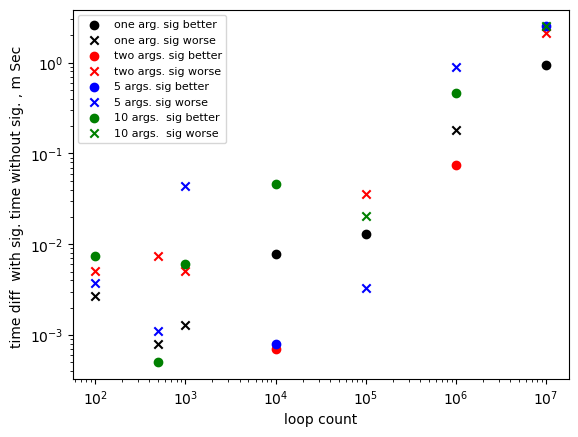

In [151]:
fig,ax = plt.subplots()
def plot_diff(t,ts,label, c):
    d= (ts - t )*1000
    #print(d)
    sel = d >= 0
    #print(label,'sig better',sel.sum())
    ax.scatter(n_particles[sel],d[sel],marker='o',label =label+ ' sig better',c=c)
    sel = d < 0
    #print(label,'sig worse',sel.sum())
    ax.scatter(n_particles[sel],np.abs(d[sel]),marker='x',label =label+ ' sig worse',c=c)

    return np.sign(d)*np.log10(abs(d))

plot_diff(t1, t1s,f'one arg.','k')

#ax.plot(n_particles, log_signed_diff(t1, t1sDT),label =f'one arg. with structure')
plot_diff(t2,t2s,f'two args.','r')
plot_diff(t5, t5s, f'5 args.', 'b')
plot_diff(t10,t10s,f'10 args. ','g')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.plot(ax.get_xlim(),ax.get_xlim(),c=[.8,.8,.8])
ax.legend(prop={'size': 8})
ax.set_ylabel('time diff  with sig. time without sig. , m Sec ')
ax.set_xlabel('loop count')

# 

Text(0.5, 0, 'loop count')

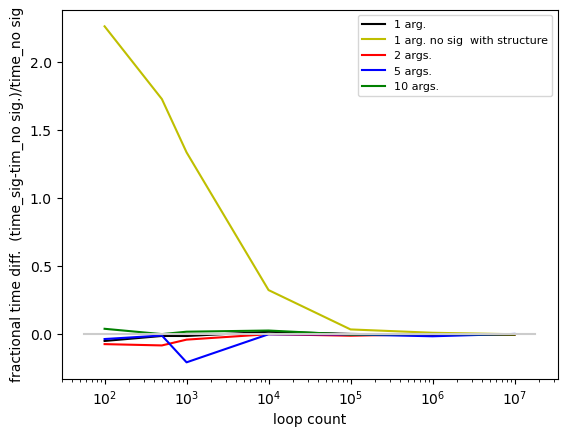

In [152]:
fig,ax = plt.subplots()
ax.plot(n_particles,(t1s-t1)/t1,label =f'1 arg.',c=c[0])
ax.plot(n_particles,(t1sDT-t1)/t1,label =f'1 arg. no sig  with structure',c='y')
ax.plot(n_particles,(t2s-t2)/t2,label =f'2 args.',c=c[1])
ax.plot(n_particles,(t5s-t5)/t5,label =f'5 args.',c=c[2])
ax.plot(n_particles,(t10s-t10)/t10,label =f'10 args.',c=c[3])

ax.set_xscale('log')
ax.plot(ax.get_xlim(),[0.,0.],c=[.8,.8,.8])
ax.legend(prop={'size': 8})
ax.set_ylabel('fractional time diff.  (time_sig-tim_no sig.)/time_no sig')
ax.set_xlabel('loop count')
#ax.set_ylim([-.05,.02])

[5.62000205e-05 7.15999631e-05 1.09100016e-04 1.79799972e-04]
[7.05000130e-05 9.15999990e-05 1.35499984e-04 2.35999993e-04]
[0.000111  0.0001332 0.0002131 0.000308 ]
[0.0004032 0.0004173 0.0007363 0.0016292]
[0.003632  0.0036911 0.0065176 0.0149694]
[0.036082  0.0366592 0.0654093 0.1487004]
[0.508402  0.5383349 0.7073664 1.5253557]


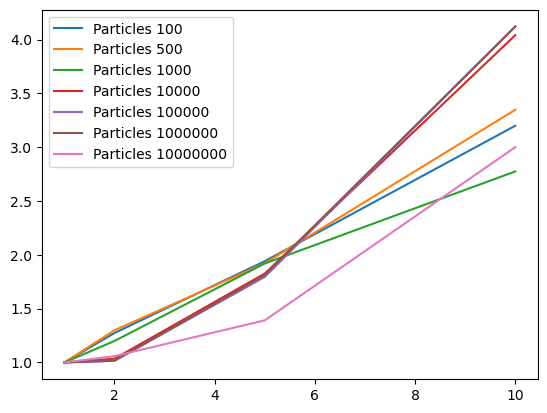

In [153]:
# look at effect of argument numbers, no signature, no structure
# stack redsults
t = np.stack((t1,t2,t5,t10),axis=1).T
#print(t.shape, t)
args= np.asarray([1, 2, 5, 10])
fig,ax = plt.subplots()

for n in range(t.shape[1]):
    print(t[:,n])
    ax.plot(args,t[:,n]/t[0,n] , label =f'Particles {n_particles[n]}')

#ax.plot(args, t,label =f'one arg.')
#ax.set_yscale('log')

ax.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1.83100055e-04 1.92100008e-04 2.59099994e-04 5.34199993e-04
 3.76450003e-03 3.65184000e-02 5.09023400e-01]


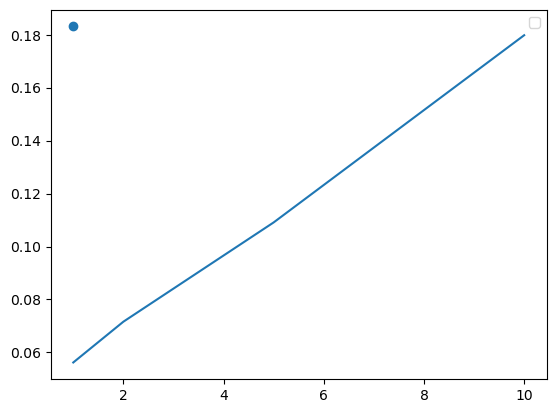

In [154]:
# look overhead at min work
print(t1sDT)
args= np.asarray([1, 2, 5, 10])
fig,ax = plt.subplots()

ax.plot(args,t[:,0]*1000 )
ax.scatter(args[0],t1sDT[0]*1000 )
#ax.plot(args, t,label =f'one arg.')
#ax.set_yscale('log')

ax.legend()